# Linear Regression W Python E-commerce Dataset

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pylab
import scipy.stats as stats
import pickle 

In [11]:
df = pd.read_csv('Ecommerce_Customers')

In [12]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [14]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploratory Data Analysis

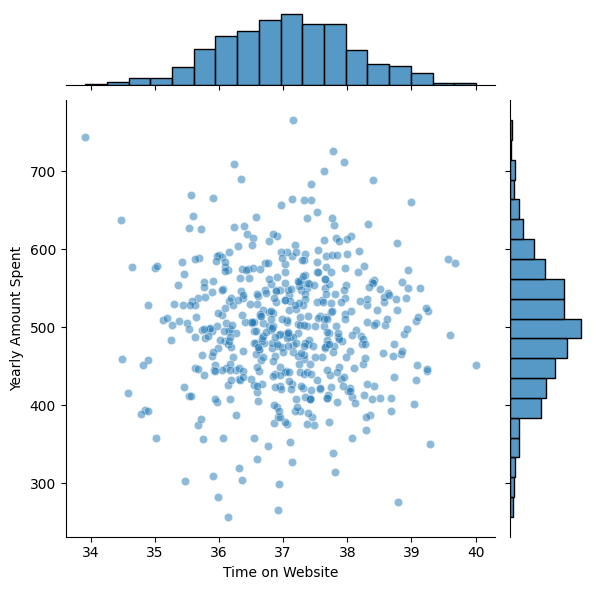

In [15]:
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = df, alpha = 0.5)

From the plot, we can't see any clear correlation between the time on website and the yearly amount spent. Most of the data points are concentrated around the center.

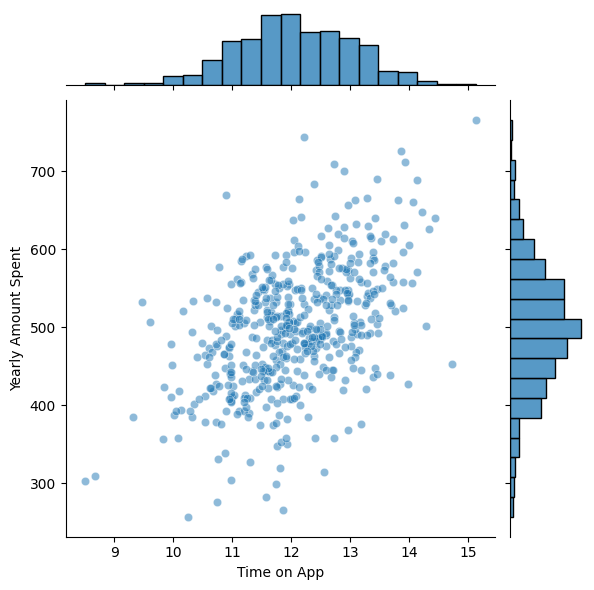

In [16]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = df, alpha = 0.5)

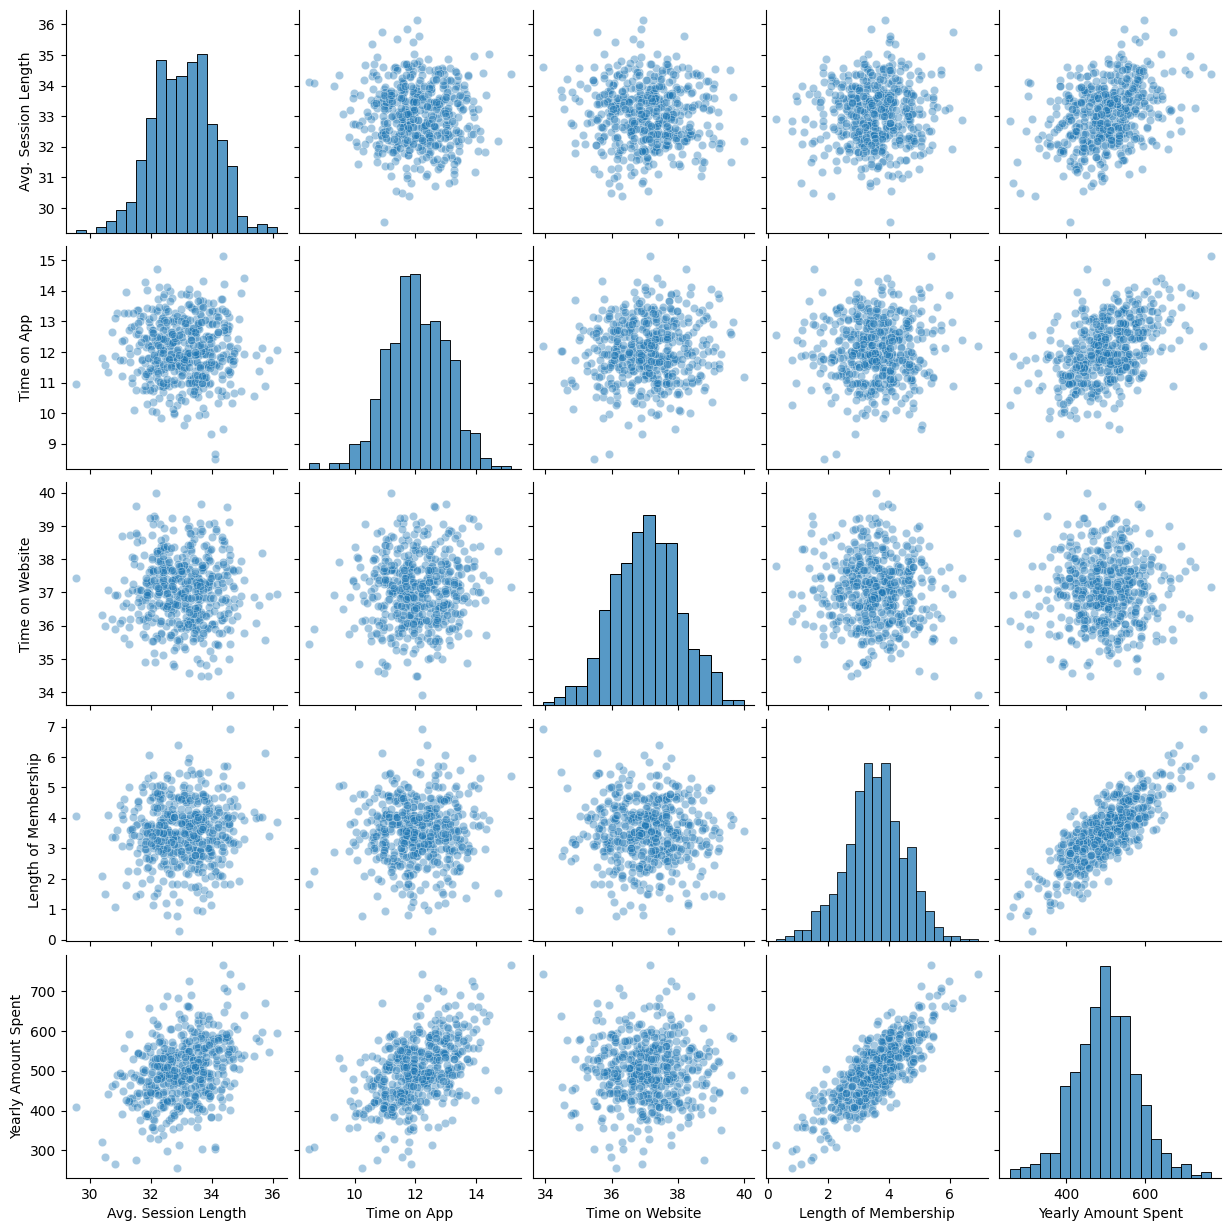

In [17]:
sns.pairplot(kind = 'scatter', plot_kws={"alpha": 0.4},data = df)

In [18]:
#checking for the correlation between different numerical variables
df.select_dtypes(float).corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


We can see that there is a strong correlation between the Length of Membership and Yearly Amount Spent (around 0.81) while the correlation between our target variable (Yearly Amount Spent) and variables such as Time on Website is a very weak (0.002). The correlation between Time on App and our target variable is moderate (0.499). We can also represent the correlation between the variables visually using a heatmap.

<Axes: >

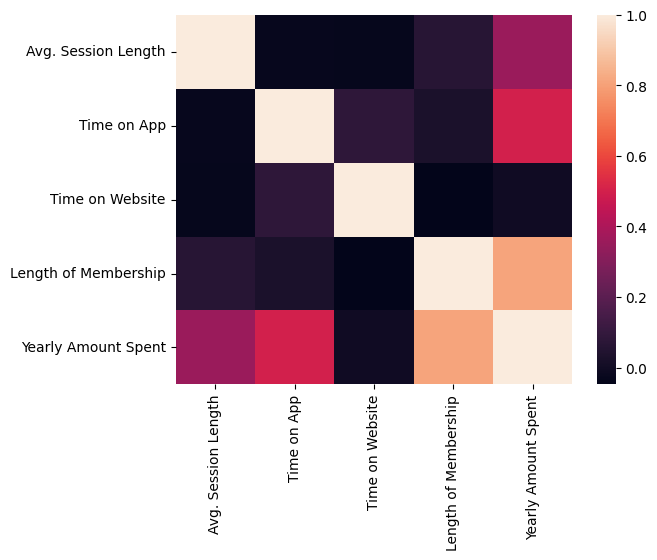

In [19]:
sns.heatmap(df.select_dtypes(float).corr())

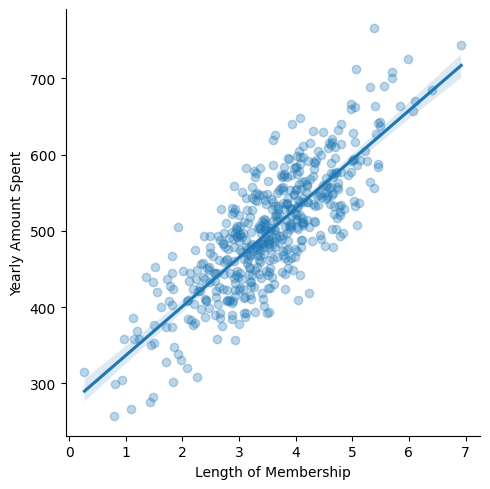

In [20]:
sns.lmplot(x = 'Length of Membership',
           y = 'Yearly Amount Spent',
           data = df,
           scatter_kws = {'alpha': 0.3}
           )

# Splitting our data for the model

In [21]:

#our training data
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

We need to split our data so that we can have the independent variables('Variables that will help us to predict the value of the target variable') and the target variable 'y' ('Yearly Amount Spent'). We also need to remove the variables which are not going to be useful to the model such as the 'Email' 'Address' 'Avatar' columns.

In [22]:
X = df.drop(columns = ['Email', 'Address', 'Avatar', 'Yearly Amount Spent'])
y = df['Yearly Amount Spent']

We will also need to split our data so that we can have data for the model to train on (training data) and the data which we can use to evaluate our model's performance. It's good to have more training data than the the testing data, typically a 80-20 ratio depending on the size of your data.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

# Establishing Baseline
A baseline in the context of machine learning and predictive modeling is a simple model or reference point against which the performance of more complex models can be compared. It typically involves straightforward predictions, such as using the mean or median of the target variable for regression tasks.

In [24]:
# Step 1: Establish a baseline model using the mean price
mean_price = y_train.mean()
y_pred_baseline = np.full(y_test.shape, mean_price)  # Predict the mean price for all test instances
baseline_r2 = r2_score(y_test, y_pred_baseline)
# Step 2: Evaluate the baseline model
baseline_mae = mean_absolute_error(y_test, y_pred_baseline)
baseline_mse = mean_squared_error(y_test, y_pred_baseline)

print("Baseline R^2 Score:", baseline_r2)
print("Baseline Mean Absolute Error:", baseline_mae)
print("Baseline Mean Squared Error:", baseline_mse)


Baseline R^2 Score: -0.036211019877467665
Baseline Mean Absolute Error: 54.910826937639115
Baseline Mean Squared Error: 5131.038091519208


# Building our model
Since we are working with data consisting of variables that seem to have linear relationships that have a causal effect on our target variable, we should use a linear model e.g. a Linear Regression model.

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
#initialize an instance of our model
lr = LinearRegression()

In [27]:
#fit our model
lr.fit(X_train, y_train)

LinearRegression()

In a linear regression model, coefficients are the parameters that represent the relationship between the independent variables (predictors) and the dependent variable (outcome). Specifically, they indicate how much the dependent variable is expected to change when the corresponding independent variable increases by one unit, while holding all other variables constant.

In [ ]:
#getting our coefficients
lr.coef_

array([25.5962591 , 38.78534598,  0.31038593, 61.89682859])

In [29]:
#creating a dataframe from our coefficients
cdf = pd.DataFrame(lr.coef_, X.columns, columns = ['Coef'])
cdf

,Coef
Avg. Session Length,25.596259
Time on App,38.785346
Time on Website,0.310386
Length of Membership,61.896829


Text(0.5, 1.0, 'Feature Coefficients')

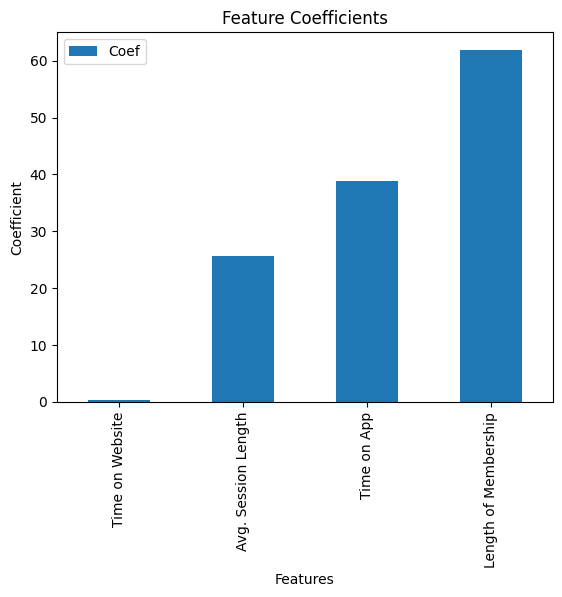

In [30]:
cdf.sort_values(by='Coef').plot(kind = 'bar')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Coefficients')

From the plot above, we can see that the variable with the strongest coefficient as per our model is the 'Length of Membership' variable followed by 'Time on App' while the coefficient 'Time on Website' seems to have litttle importance in terms of predicting the value for our target variable ('Yearly Amount Spent')

# Making Predictions

In [31]:
#storing our test predictions
predictions = lr.predict(X_test)
predictions

array([402.86230051, 542.53325708, 426.62011918, 501.91386363,
       409.6666551 , 569.92155038, 531.50423529, 505.94309188,
       408.10378607, 473.45942928, 441.18668812, 424.52463471,
       424.83341694, 527.12061508, 430.87985533, 423.47062047,
       575.8751518 , 484.6563331 , 457.77896975, 481.58742311,
       501.56110993, 513.12815188, 507.49166899, 646.63377343,
       449.70050586, 496.26290484, 556.18523776, 554.78684161,
       399.1582784 , 325.16921284, 532.62732659, 477.73025415,
       500.76491535, 305.09971374, 505.46811902, 483.52069444,
       519.09464122, 437.75549737, 456.25005245, 470.63517876,
       494.11207805, 444.65549239, 508.57079732, 500.88197484,
       488.35128728, 535.34025218, 594.58301773, 513.59474408,
       279.69877702, 432.71590835, 421.06976164, 480.94327496,
       584.59481888, 608.61734059, 564.42312991, 494.47224504,
       393.95593318, 456.11321352, 572.92228417, 499.27385693,
       512.42973545, 391.56170305, 479.60705887, 481.05

After getting our predictions for the target variable, we need to compare the values, to our test data. We can do that using a scatter plot. We expect to see a linear trend between the two sets of data.

# Evaluating Model Performance

<Axes: ylabel='Yearly Amount Spent'>

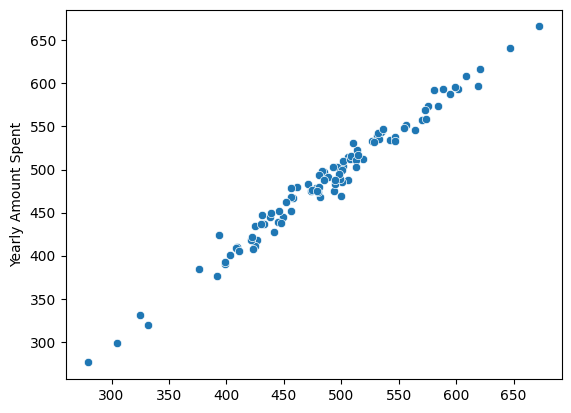

In [32]:
sns.scatterplot(y = y_test, x = predictions)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

In [34]:
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', r2_score(y_test, predictions))

Mean Absolute Error: 8.558441885315242
Mean Squared Error: 109.86374118393995
Root Mean Squared Error: 10.481590584636473
R2 Score: 0.9778130629184126


The developed regression model significantly outperforms the baseline model across all metrics. With an R² score of 0.98 and considerably lower error metrics (MAE, MSE, RMSE), the model demonstrates a strong ability to predict the target variable accurately. The results suggest that the model is effective and provides a substantial improvement over the baseline approach.

# Plotting Residuals
In linear models, residuals are the differences between the observed values and the values predicted by the model.
Assumptions Check: Analyzing residuals can help check the assumptions of linear regression, including:

Linearity: The relationship between predictors and the response variable should be linear.
Homoscedasticity: Residuals should have constant variance across all levels of the independent variables.
Independence: Residuals should be independent of each other.
Normality: Residuals should be approximately normally distributed, especially for inference purposes.

C:\Users\ochie\AppData\Local\Temp\ipykernel_7788\1422735845.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions), bins = 50, kde = True)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

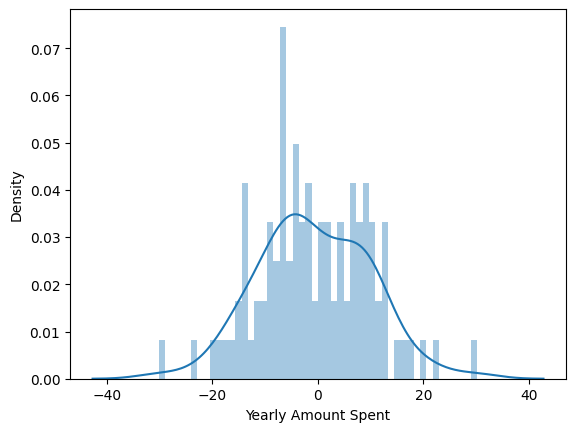

In [35]:
#checking residuals
sns.distplot((y_test - predictions), bins = 50, kde = True)

# Test for Normality


((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

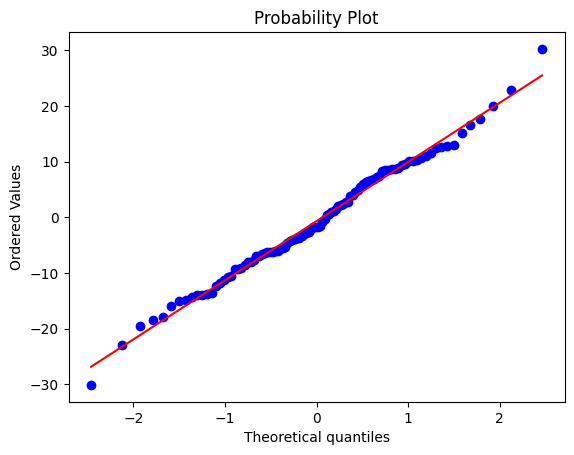

In [36]:
stats.probplot((y_test - predictions), dist = 'norm', plot = pylab)

The Q-Q plot helps visually assess whether this assumption holds. We can see that the points on the plot closely follow a straight line, it suggests that the residuals are normally distributed.

# Saving the model


In [37]:
#save the model to a file
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr, file)